<a href="https://colab.research.google.com/github/robptrck/electric-vehicles-WA/blob/main/electric_vehicles_WA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Electric Vehicles in Washington State

Data Source: https://data.wa.gov/Transportation/Electric-Vehicle-Population-Data/f6w7-q2d2

## EDA

In [1]:
import pandas as pd

df = pd.read_csv('/content/Electric_Vehicle_Population_Data.csv')
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WP0AB2Y13M,Thurston,Olympia,WA,98513,2021,PORSCHE,TAYCAN,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,203,0,2.0,156659646,POINT (-122.751179 47.002092),PUGET SOUND ENERGY INC,53067012331
1,1N4BZ1CP0K,Grant,Quincy,WA,98848,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,12.0,157077469,POINT (-119.830891 47.164101),PUD NO 2 OF GRANT COUNTY,53025011200
2,1G1FX6S06J,Skagit,Mount Vernon,WA,98274,2018,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,10.0,250701013,POINT (-122.250701 48.368138),PUGET SOUND ENERGY INC,53057952700
3,JTDKAMFP3M,Yakima,Yakima,WA,98902,2021,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,156585922,POINT (-120.532719 46.59458),NaN,53077001000
4,1N4AZ1CP4L,Snohomish,Everett,WA,98208,2020,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,149,0,44.0,128498779,POINT (-122.19615 47.894423),PUGET SOUND ENERGY INC,53061052120


In [2]:
df.shape

(100269, 17)

In [4]:
df.nunique()

VIN (1-10)                                             6853
County                                                  161
City                                                    629
State                                                    41
Postal Code                                             768
Model Year                                               19
Make                                                     34
Model                                                   109
Electric Vehicle Type                                     2
Clean Alternative Fuel Vehicle (CAFV) Eligibility         3
Electric Range                                          100
Base MSRP                                                37
Legislative District                                     49
DOL Vehicle ID                                       100269
Vehicle Location                                        748
Electric Utility                                         69
2020 Census Tract                       

In [9]:
df[['Make', 'Model', 'Model Year']]

,Make,Model,Model Year
0,PORSCHE,TAYCAN,2021
1,NISSAN,LEAF,2019
2,CHEVROLET,BOLT EV,2018
3,TOYOTA,PRIUS PRIME,2021
4,NISSAN,LEAF,2020
...,...,...,...
100264,HYUNDAI,IONIQ 5,2022
100265,TESLA,MODEL X,2018
100266,TESLA,MODEL S,2017
100267,TESLA,MODEL 3,2018


In [7]:
models = df[['Make', 'Model', 'Model Year']]

In [10]:
models = models.drop_duplicates()
models

,Make,Model,Model Year
0,PORSCHE,TAYCAN,2021
1,NISSAN,LEAF,2019
2,CHEVROLET,BOLT EV,2018
3,TOYOTA,PRIUS PRIME,2021
4,NISSAN,LEAF,2020
...,...,...,...
70408,BMW,740E XDRIVE,2019
85029,TOYOTA,RAV4,2002
92969,PORSCHE,918 SPYDER,2015
93006,RIVIAN,EDV,2022


In [12]:
models['Make'].nunique()

34

In [13]:
models['Model'].nunique()

109

In [15]:
models['Model Year'].nunique()

19

## Visualizations

In [17]:
import seaborn as sns

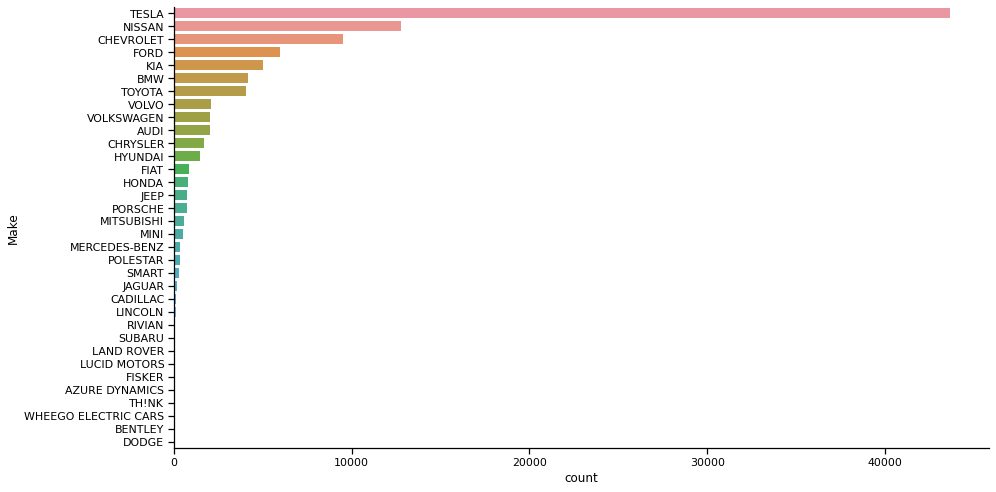

In [57]:
sns.catplot(data=df, y='Make',kind='count',ci=None,legend_out=False, height=7, aspect=2, order=df['Make'].value_counts().index)

### Removing outlier (Tesla)

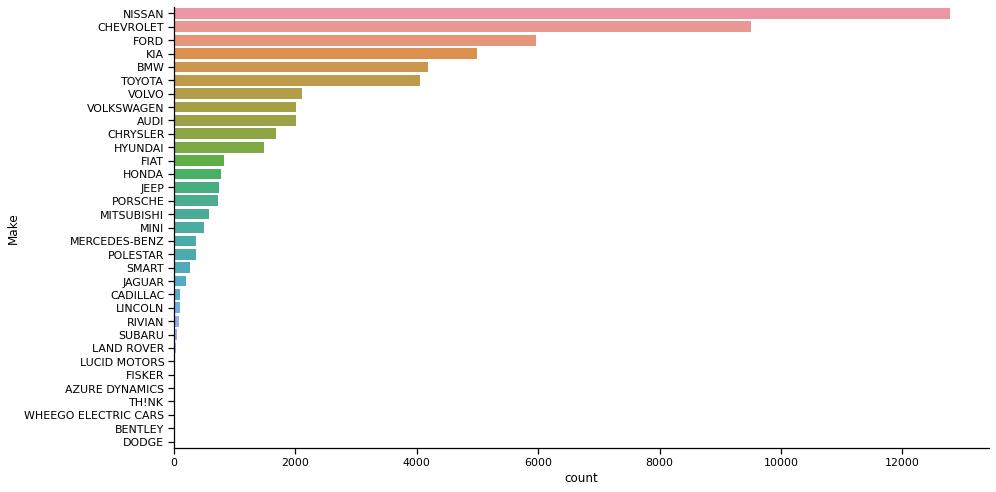

In [58]:
plot_order = df['Make'].value_counts().sort_values(ascending=False).index.values
sns.catplot(data=df, y='Make',kind='count',ci=None, legend_out=False, height=7, aspect=2, order=plot_order[1:])

Text(0.5, 1.0, 'Electric and Plug-In Hybrid Vehicles in Washington State')

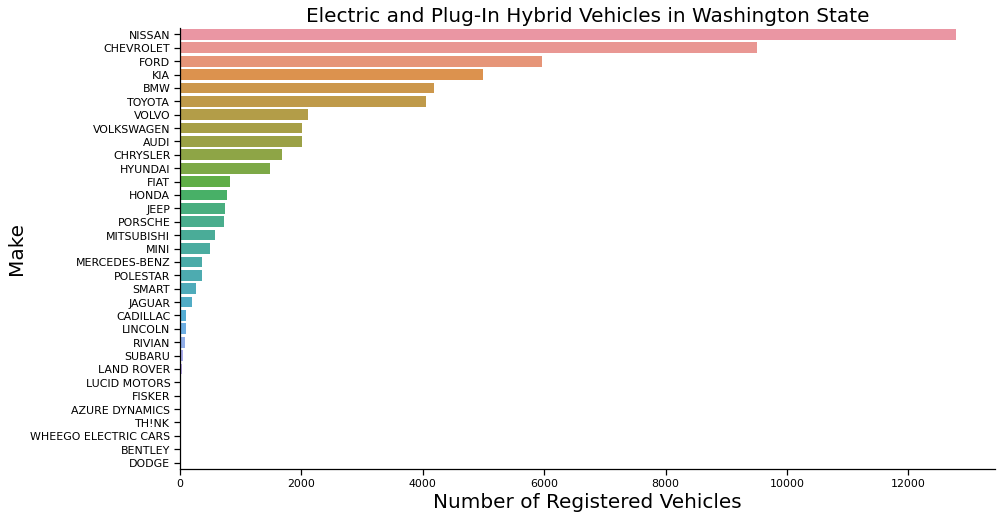

In [74]:
import matplotlib.pyplot as plt

sns.catplot(data=df, y='Make',kind='count',ci=None, legend_out=False, height=7, aspect=2, order=plot_order[1:])
plt.xlabel('Number of Registered Vehicles', fontsize=20)
plt.ylabel('Make', fontsize=20)
plt.title('Electric and Plug-In Hybrid Vehicles in Washington State', fontsize=20)